data : https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [46]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
pip install pandas keras


In [52]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [56]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
# from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, SGD, RMSprop

In [57]:
from tensorflow.keras.utils import to_categorical


In [58]:
directory = "d:/Users/sanket/Downloads/MNIST DATASET"
# or 
# directory = r"d:/Users/sanket/Downloads/MNIST DATASET"
# or 
# directory = r"d:\Users\sanket\Downloads/MNIST DATASET"  | directory = r"d:\Users\sanket\Downloads\MNIST DATASET"

In [59]:
df = pd.read_csv(directory + '/mnist_train.csv')
# df = pd.read_csv(directory + r'\mnist_test.csv')

In [60]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.shape

(60000, 785)

In [63]:
# seperating label from the dataset, normalizing and reshaping the images to 28*28
# training dataset
train_labels = df['label'].values.reshape((-1, 1))
train_images = df.drop(columns=['label']).values

#### View as images

In [64]:
train_images = train_images.reshape((-1, 28, 28)).astype('float32')/255

The images are reshaped into shape (28, 28) (shape for training data with 60000 examples = (60000, 28, 28)). '-1' automatically detects the overall size. It would be useful for plotting some images.

In [65]:
train_images.shape

(60000, 28, 28)

In [66]:
def plot_images(images, labels, image_number):
    plt.imshow(images[image_number], cmap='gray')
    plt.title(f'label: {labels[image_number]}')

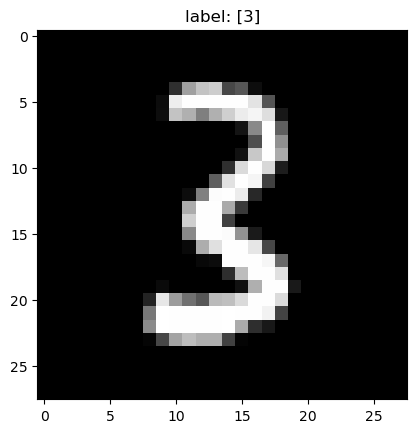

In [67]:
plot_images(train_images, train_labels, 50000)

In [68]:
### Reshape again to build model

In [69]:
train_images = train_images.reshape((-1, 28*28))

#### Test data

In [71]:
df_test = pd.read_csv(directory + r'\mnist_test.csv')

In [72]:

test_labels = df_test['label'].values.reshape((-1, 1))
test_images = df_test.drop(columns=['label']).values

In [74]:
# One-hot encode the labels
y_train = to_categorical(train_labels, 10)
y_test = to_categorical(test_labels, 10)


In [75]:
y_train.shape

(60000, 10)

### Building a Neural network:

In [76]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(train_images)
X_test_norm = normalizer.fit_transform(test_images)

#### Attempt 1

In [77]:
model_1 = Sequential()

In [78]:
model_1.add(Dense(input_shape=(784,), units = 128, activation='relu'))

In [79]:
model_1.add(Dense(units = 64, activation='relu'))

In [80]:
model_1.add(Dropout(0.5))

In [81]:
model_1.add(Dense(10, activation="softmax"))

In [82]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
y_train.shape

(60000, 10)

In [85]:
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8070 - loss: 0.6427 - val_accuracy: 0.9531 - val_loss: 0.1604
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9339 - loss: 0.2236 - val_accuracy: 0.9633 - val_loss: 0.1343
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9481 - loss: 0.1687 - val_accuracy: 0.9636 - val_loss: 0.1374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9558 - loss: 0.1467 - val_accuracy: 0.9687 - val_loss: 0.1187
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9609 - loss: 0.1316 - val_accuracy: 0.9707 - val_loss: 0.1304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9681 - loss: 0.1056 - val_accuracy: 0.9681 - val_loss: 0.1485
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9655 - loss: 0.1054 - val_accuracy: 0.9688 - val_loss: 0.1459
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9704 - loss: 0.0939 -

In [86]:
#y_pred_class_nn_1 = model_1.predict(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


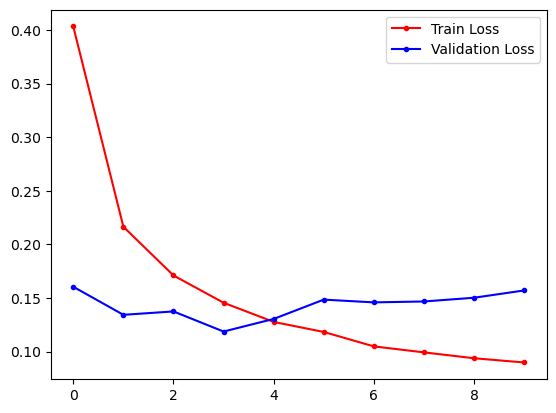

In [87]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Attempt 2

In [88]:
model = Sequential([
    Dense(128, input_shape = (784,), activation='relu'),  # First hidden layer with 128 neurons and ReLU activation.
    Dropout(0.5),  # Dropout layer after the first hidden layer
    Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes) and softmax activation.
])


In [89]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(optimizer='adam',  # Optimizer
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # List of metrics to be evaluated by the model during training and testing


In [91]:
run_hist_2 =model.fit(X_train_norm, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8091 - loss: 0.6909 - val_accuracy: 0.9404 - val_loss: 0.2197
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9168 - loss: 0.3212 - val_accuracy: 0.9547 - val_loss: 0.1969
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9302 - loss: 0.2818 - val_accuracy: 0.9581 - val_loss: 0.1902
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9336 - loss: 0.2411 - val_accuracy: 0.9591 - val_loss: 0.1879
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9396 - loss: 0.2220 - val_accuracy: 0.9644 - val_loss: 0.1926
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9459 - loss: 0.1964 - val_accuracy: 0.9651 - val_loss: 0.1775
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9470 - loss: 0.1908 - val_accuracy: 0.9646 - val_loss: 0.1839
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9494 - loss: 0.1750 - 

In [92]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9609 - loss: 0.2507
Test accuracy: 0.9660000205039978


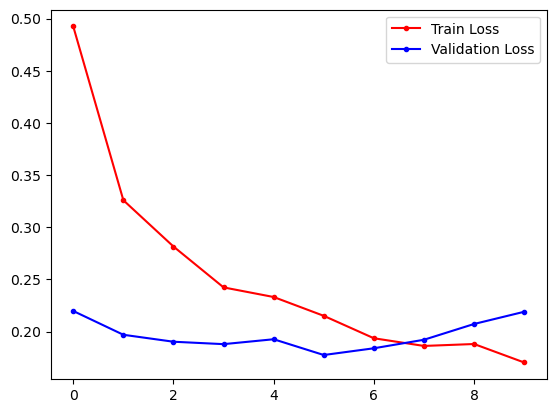

In [93]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [94]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# model.fit(X_train_norm, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


In [95]:
# from keras.regularizers import l1_l2

# model = Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
#     Dense(10, activation='softmax')
# ])
